## Build model to classify projection vs. interneurons

In [1]:
import pandas as pd
import sys 
import seaborn as sns 
import matplotlib.pyplot as plt
sys.path.append("../..")
%matplotlib inline

In [2]:
df = pd.read_csv("../../data/180531Thu_Binary_Classificationinterneuron_projection.csv", index_col=0)

In [3]:
df.head()

,_id,bif_ampl_local,branch_Order,contraction,depth,diameter,eucDistance,fractal_Dim,fragmentation,height,...,n_stems,neuron_id,neuron_name,partition_asymmetry,pathDistance,pk_classic,soma_Surface,surface,volume,width
1173,5afb214f9d477a8da41150a1,92.07,17.0,0.91,72.23,1.08,91.83,1.04,290.0,129.86,...,1.0,1173,12070404c1,0.59,123.35,1.77,NaN,2318.51,716.09,44.09
1174,5afb214f9d477a8da41150a2,87.59,14.0,0.91,34.93,0.87,101.82,1.04,468.0,116.04,...,1.0,1174,CT12T2,0.60,122.74,1.82,NaN,2230.54,617.22,82.20
1175,5afb214f9d477a8da41150a3,81.47,18.0,0.92,47.38,0.79,108.99,1.04,357.0,124.10,...,1.0,1175,DB12L2,0.66,142.08,1.81,NaN,1628.39,355.34,73.38
1176,5afb214f9d477a8da41150a4,96.34,11.0,0.91,49.00,0.73,84.09,1.03,269.0,132.18,...,1.0,1176,DL24T2,0.56,149.23,1.98,NaN,1014.74,192.99,29.95
1177,5afb214f9d477a8da41150a5,97.00,14.0,0.90,41.00,0.71,100.47,1.04,305.0,131.40,...,1.0,1177,DL41L2,0.58,126.88,1.93,NaN,1101.33,217.87,30.45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24386 entries, 1173 to 51013
Data columns (total 24 columns):
_id                    24386 non-null object
bif_ampl_local         24386 non-null float64
branch_Order           24386 non-null float64
contraction            24386 non-null float64
depth                  24386 non-null float64
diameter               24386 non-null float64
eucDistance            24386 non-null float64
fractal_Dim            24386 non-null float64
fragmentation          24386 non-null float64
height                 24386 non-null float64
label                  24386 non-null object
length                 24386 non-null float64
n_bifs                 24386 non-null float64
n_branch               24386 non-null float64
n_stems                24386 non-null float64
neuron_id              24386 non-null int64
neuron_name            24386 non-null object
partition_asymmetry    24386 non-null float64
pathDistance           24386 non-null float64
pk_classic         

In [5]:
df.describe()

,bif_ampl_local,branch_Order,contraction,depth,diameter,eucDistance,fractal_Dim,fragmentation,height,length,...,n_branch,n_stems,neuron_id,partition_asymmetry,pathDistance,pk_classic,soma_Surface,surface,volume,width
count,24386.000000,24386.000000,24386.000000,24386.000000,24386.000000,24386.000000,24386.000000,24386.000000,24386.000000,24386.000000,...,24386.000000,24386.000000,24386.000000,24386.000000,24386.000000,24386.000000,7690.000000,24386.000000,24386.000000,24386.000000
mean,99.073975,16.920446,0.780830,107.291212,0.986543,308.581097,1.107682,409.576642,276.247454,2568.987361,...,90.828467,1.000041,26169.765685,0.618865,706.719641,1.991451,3.103086,8058.147964,2017.043595,179.779739
std,11.578286,10.734291,0.041165,68.545307,0.110681,166.223960,0.026467,449.029330,166.455388,2599.414863,...,106.137007,0.006404,11557.006263,0.112740,408.640626,0.124902,0.334581,8176.992918,2045.154340,112.582311
min,0.000000,0.000000,0.410541,1.760000,0.150000,8.000000,1.000000,10.000000,5.270000,36.720000,...,1.000000,1.000000,1173.000000,0.000000,13.330000,0.000000,0.175857,24.160000,1.450000,2.930000
25%,93.144550,10.000000,0.760618,53.630000,1.000000,187.507000,1.091320,166.000000,151.647000,1083.222500,...,33.000000,1.000000,16833.250000,0.568263,407.213500,2.000000,3.141590,3409.715000,854.068250,95.959300
50%,98.896750,14.000000,0.781356,93.830000,1.000000,273.367000,1.105095,263.000000,238.053500,1737.260000,...,59.000000,1.000000,22929.500000,0.627549,626.474500,2.000000,3.141590,5451.825000,1368.190000,159.900000
75%,104.808750,22.000000,0.800384,145.480000,1.000000,404.039250,1.122868,478.000000,370.082000,3082.787500,...,109.000000,1.000000,39593.750000,0.679962,941.439250,2.000000,3.141600,9680.227500,2426.855000,240.732250
max,176.166000,109.000000,0.970000,514.000000,2.230000,1496.600000,1.280320,5910.000000,1562.130000,40260.900000,...,2527.000000,2.000000,51013.000000,0.952381,4294.420000,5.500000,3.740000,126483.000000,31620.900000,1069.060000


In [6]:
feature_col_index = [1,2,3,5,6,7,8,9,11,12,13,14,17,18,19,21,22,23]

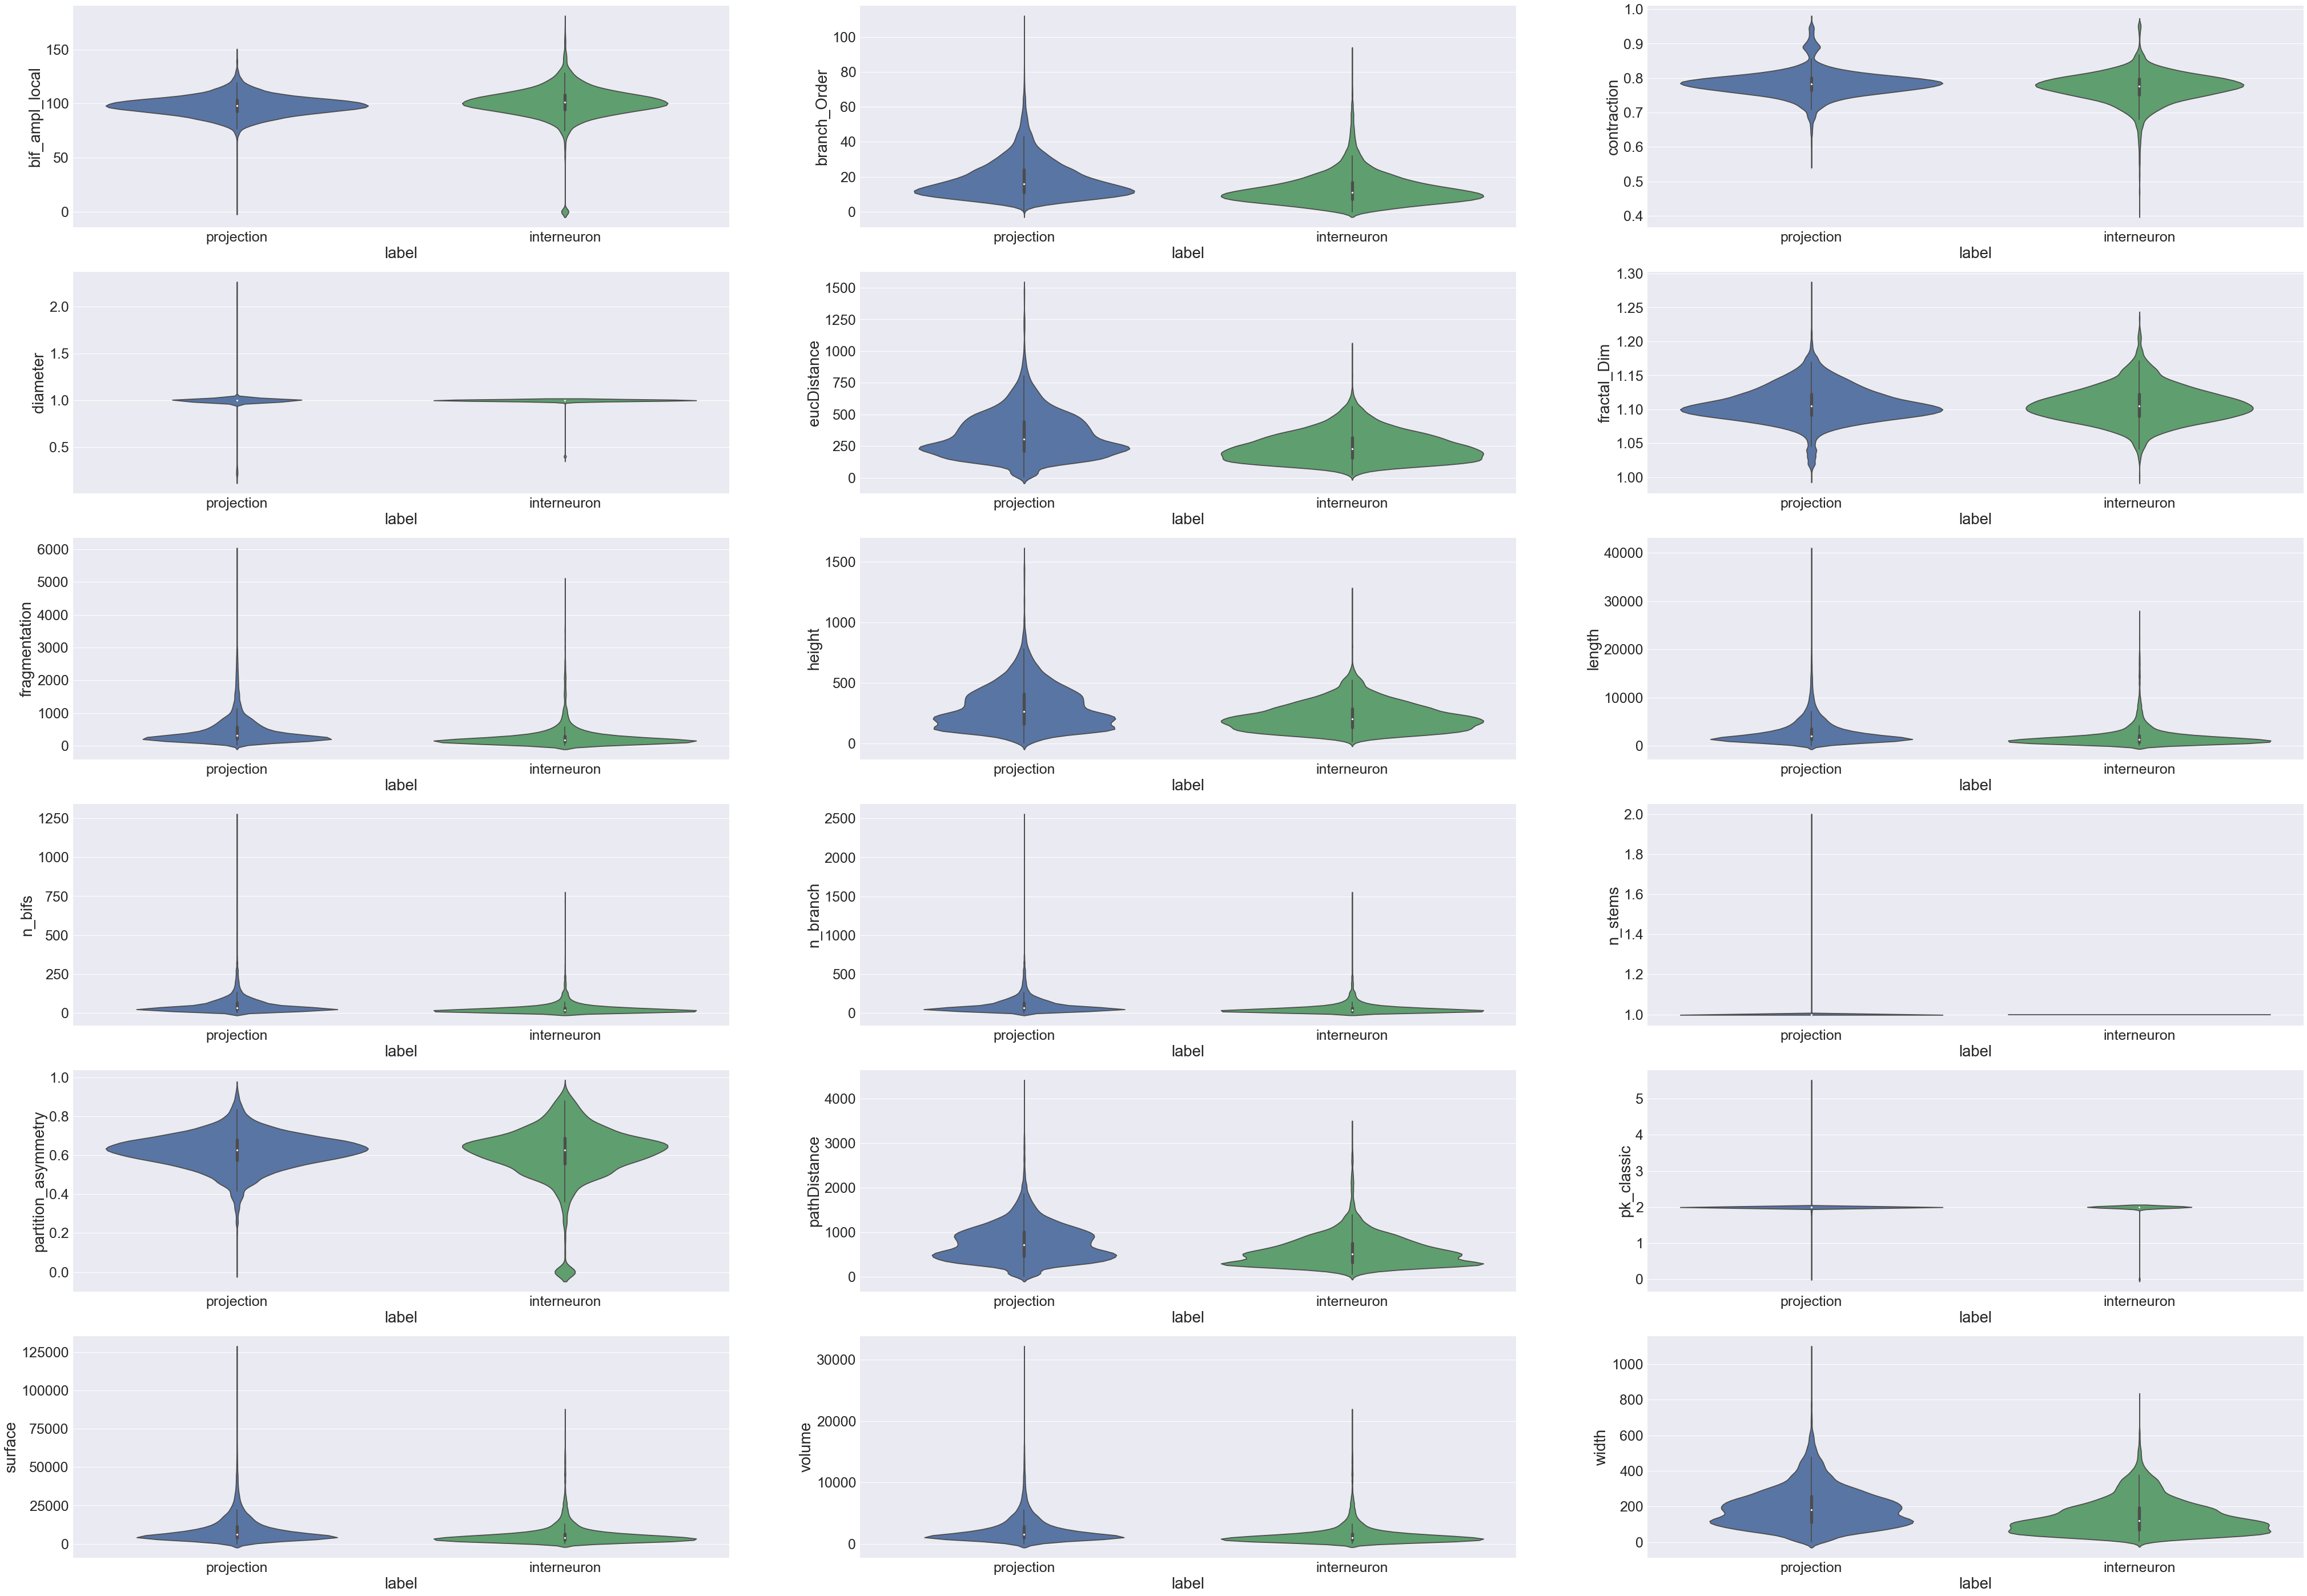

In [7]:
sns.set(font_scale=2.5)
fig, ax = plt.subplots(int(len(feature_col_index)/3),3,figsize=(70,50))
axs = ax.flatten()
for i,a in enumerate(feature_col_index): 
    sns.violinplot(x="label", y=df.columns[a], data=df, ax=axs[i])

In [8]:
for i,c in enumerate(df.columns): 
    print(i,c)

0 _id
1 bif_ampl_local
2 branch_Order
3 contraction
4 depth
5 diameter
6 eucDistance
7 fractal_Dim
8 fragmentation
9 height
10 label
11 length
12 n_bifs
13 n_branch
14 n_stems
15 neuron_id
16 neuron_name
17 partition_asymmetry
18 pathDistance
19 pk_classic
20 soma_Surface
21 surface
22 volume
23 width


In [9]:
df.label = df.label.astype("category")

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [11]:
X = df.iloc[:,feature_col_index]
y = df.label

In [42]:
X_cv, X_test, y_cv, y_test = train_test_split(X,y,random_state = 1, test_size=.2)

In [43]:
X_train, X_cvt, y_train, y_cvt = train_test_split(X_cv, y_cv, test_size=.2,random_state=1)

In [44]:
lrmodel = LogisticRegression()

In [45]:
cross_val_score(lrmodel, X_train, y_train)

array([0.74360946, 0.74490581, 0.73793501])

In [46]:
lrmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
lrmodel.predict(X_cvt)

array(['interneuron', 'projection', 'interneuron', ..., 'projection',
       'projection', 'projection'], dtype=object)

In [72]:
from sklearn.metrics import roc_curve

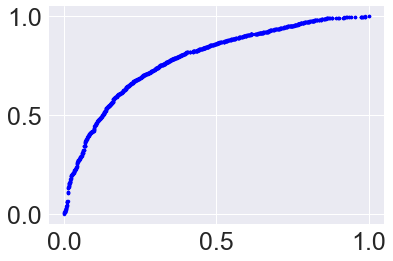

In [151]:
fpr,tpr,thresh = roc_curve(y_cvt,lrmodel.predict_proba(X_cvt)[:,1],pos_label="projection");
plt.plot(fpr, tpr,'b.')

In [152]:
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    return idx

In [153]:
thresh[find_nearest(fpr,0.4)]

0.5695687564867519

In [154]:
tpr[find_nearest(fpr,.4)]

0.8136810279667422

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfmodel = RandomForestClassifier(n_estimators=200)

In [81]:
cross_val_score(rfmodel, X_train, y_train)

array([0.80818758, 0.81064975, 0.80945972])

In [83]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

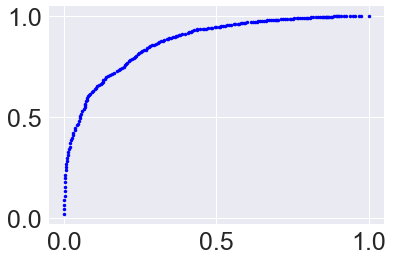

In [84]:
fpr,tpr,thresh = roc_curve(y_cvt,rfmodel.predict_proba(X_cvt)[:,1],pos_label="projection");
plt.plot(fpr, tpr,'b.')

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ["precision_macro", "recall_macro", "accuracy"]

In [40]:
gbmodel = GradientBoostingClassifier()
gbscores = cross_validate(gbmodel, X_train, y_train, cv=3,scoring=scoring)

In [85]:
gbmodel.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

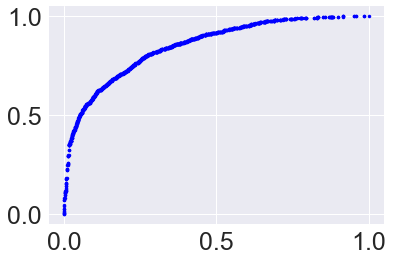

In [86]:
fpr,tpr,thresh = roc_curve(y_cvt,gbmodel.predict_proba(X_cvt)[:,1],pos_label="projection");
plt.plot(fpr, tpr,'b.')

In [21]:
print(gbscores)

{'fit_time': array([3.61813498, 2.3787179 , 2.49891114]), 'score_time': array([0.13875484, 0.12231708, 0.1217227 ]), 'test_precision_macro': array([0.76684969, 0.7736748 , 0.76579508]), 'train_precision_macro': array([0.79174837, 0.79780129, 0.7990361 ]), 'test_recall_macro': array([0.70898882, 0.71702404, 0.70781419]), 'train_recall_macro': array([0.73559035, 0.73629121, 0.73469315]), 'test_accuracy': array([0.77936654, 0.78514303, 0.77852968]), 'train_accuracy': array([0.79952322, 0.80209134, 0.80186068])}


In [22]:
print(gbscores)

{'fit_time': array([3.61813498, 2.3787179 , 2.49891114]), 'score_time': array([0.13875484, 0.12231708, 0.1217227 ]), 'test_precision_macro': array([0.76684969, 0.7736748 , 0.76579508]), 'train_precision_macro': array([0.79174837, 0.79780129, 0.7990361 ]), 'test_recall_macro': array([0.70898882, 0.71702404, 0.70781419]), 'train_recall_macro': array([0.73559035, 0.73629121, 0.73469315]), 'test_accuracy': array([0.77936654, 0.78514303, 0.77852968]), 'train_accuracy': array([0.79952322, 0.80209134, 0.80186068])}


In [23]:
from sklearn.cluster import KMeans

In [24]:
kmmodel = KMeans(n_clusters=2)

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

In [142]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [144]:
X_train_t  = scaler.transform(X_train)

In [127]:
labs = {"interneuron":0,"projection":1}

In [145]:
X_cvt_t = scaler.transform(X_cv)

In [131]:
y_tl = np.array(list(map(lambda x:labs[x],y_train)))

In [147]:
kmscores = cross_validate(kmmodel,X_train_t,y_tl,scoring=scoring)

In [148]:
print(kmscores)

{'fit_time': array([0.30137491, 0.21247697, 0.2622571 ]), 'score_time': array([0.00820208, 0.00804305, 0.00827289]), 'test_precision_macro': array([0.39188998, 0.61315613, 0.61217486]), 'train_precision_macro': array([0.38723813, 0.60988203, 0.61244124]), 'test_recall_macro': array([0.42624826, 0.58102377, 0.57692427]), 'train_recall_macro': array([0.42494557, 0.58051357, 0.57732795]), 'test_accuracy': array([0.53998462, 0.470396  , 0.46078431]), 'train_accuracy': array([0.54209919, 0.4709727 , 0.46376394])}


In [124]:
kmmodel.fit(X_cvt,y_cvt)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [125]:
kmmodel.predict(X_cvt)

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [32]:
from sklearn.metrics import confusion_matrix

In [135]:
confusion_matrix(y_cvt,rfmodel.predict(X_cvt))

array([[ 777,  479],
       [ 241, 2405]])